# Visualizations

Start by loading in packages.

In [1]:
import sys

sys.path.append("../")  # go to parent dir
sys.path.append("../../")  # go to parent dir

from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from python_code.settings import data_path_init
from python_code.utils.visualization_utils import plot_or_save

# Load the data to make radar plots
data_path = data_path_init()
df = pd.read_csv(data_path + '/radar3.csv')

URL1 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-Regular.ttf?raw=true')
serif_regular = FontManager(URL1)
URL2 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-ExtraLight.ttf?raw=true')
serif_extra_light = FontManager(URL2)
URL3 = ('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf?raw=true')
rubik_regular = FontManager(URL3)
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true'
robotto_bold = FontManager(URL6)

Load data from AAB season 18/19, 19/20, and 20/21.

In [2]:
df_new = df.loc[:, ~df.columns.isin(['club', 'sæson', 'Korte_målspark'])]
params1 = list(df_new.columns.values)
params = []
for ii in params1:
    if '_' in ii:
        params.append(ii.replace('_', ' '))
    else:
        params.append(ii)
            
high = df_new.max().values
low = df_new.min().values
aab_for = df.loc[(df["club"] == "AAB_for")]
aab_for18 = aab_for.loc[(aab_for["sæson"] == "18/19")]
aab_for19 = aab_for.loc[(aab_for["sæson"] == "19/20")]
aab_for20 = aab_for.loc[(aab_for["sæson"] == "20/21")]
aab_for18 = list(aab_for18.loc[:, ~aab_for18.columns.isin(['club', 'sæson', 'Korte_målspark'])].values.reshape(-1))
aab_for19 = list(aab_for19.loc[:, ~aab_for19.columns.isin(['club', 'sæson', 'Korte_målspark'])].values.reshape(-1))
aab_for20 = list(aab_for20.loc[:, ~aab_for20.columns.isin(['club', 'sæson', 'Korte_målspark'])].values.reshape(-1))
df

,club,sæson,Afslutninger,Afslutninger_på_mål,Afslutninger_per_mål,Bypassed_Players,Bypassed_Defenders,Indspil_til_sidste_tredjedel,Indspil_til_straffesparksfeltet,Korte_målspark,Linjebrud_forsvarslinje,Linjebrud_midtbanelinje,Pace,Tempo
0,AAB_for,18/19,12.4,4.0,10.2,249,54,20.8,19.8,23%,10.5,31.0,8.7,19.0
1,AAB_for,19/20,12.1,4.7,8.5,261,58,21.3,213.0,33%,11.3,28.1,9.0,19.2
2,AAB_for,20/21,9.9,3.9,7.4,229,50,19.7,18.0,43%,10.2,23.1,8.8,20.0
3,AAB_imod,18/19,11.8,4.4,9.4,236,53,20.0,18.8,18%,8.0,27.7,9.1,18.6
4,AAB_imod,19/20,12.4,4.7,10.5,246,51,18.4,19.5,16%,8.5,25.3,9.1,18.5
5,AAB_imod,20/21,11.3,4.3,9.3,241,42,18.5,18.9,33%,8.5,16.3,8.9,19.3
6,gennemsnit,18/19,12.3,4.3,9.2,254,48,21.2,20.2,24%,10.2,29.3,9.3,19.3
7,gennemsnit,19/20,12.3,4.2,9.1,249,48,20.9,19.9,29%,9.8,27.5,9.3,19.1
8,gennemsnit,20/21,11.5,4.1,8.8,244,44,19.2,18.7,31%,9.1,23.5,8.8,18.9


### Define the plots

In [3]:
# Define the plots
radar = Radar(params, low, high, round_int=[False]*len(low), num_rings=4, ring_width=1, center_circle_radius=1)


def radar_mosaic(radar_height=0.915, title_height=0.06, figheight=14):
    """ Create a Radar chart flanked by a title and endnote axes.

    Parameters
    ----------
    radar_height: float, default 0.915
        The height of the radar axes in fractions of the figure height (default 91.5%).
    title_height: float, default 0.06
        The height of the title axes in fractions of the figure height (default 6%).
    figheight: float, default 14
        The figure height in inches.

    Returns
    -------
    fig : matplotlib.figure.Figure
    axs : dict[label, Axes]
    """
    if title_height + radar_height > 1:
        error_msg = 'Reduce one of the radar_height or title_height so the total is ≤ 1.'
        raise ValueError(error_msg)
    endnote_height = 1 - title_height - radar_height
    figwidth = figheight * radar_height
    figure, axes = plt.subplot_mosaic([['title'], ['radar'], ['endnote']],
                                      gridspec_kw={'height_ratios': [title_height, radar_height,
                                                                     endnote_height],
                                                   # the grid takes up the whole of the figure 0-1
                                                   'bottom': 0, 'left': 0, 'top': 1,
                                                   'right': 1, 'hspace': 0},
                                      figsize=(figwidth, figheight))
    axes['title'].axis('off')
    axes['endnote'].axis('off')
    return figure, axes

### Make the radar plot

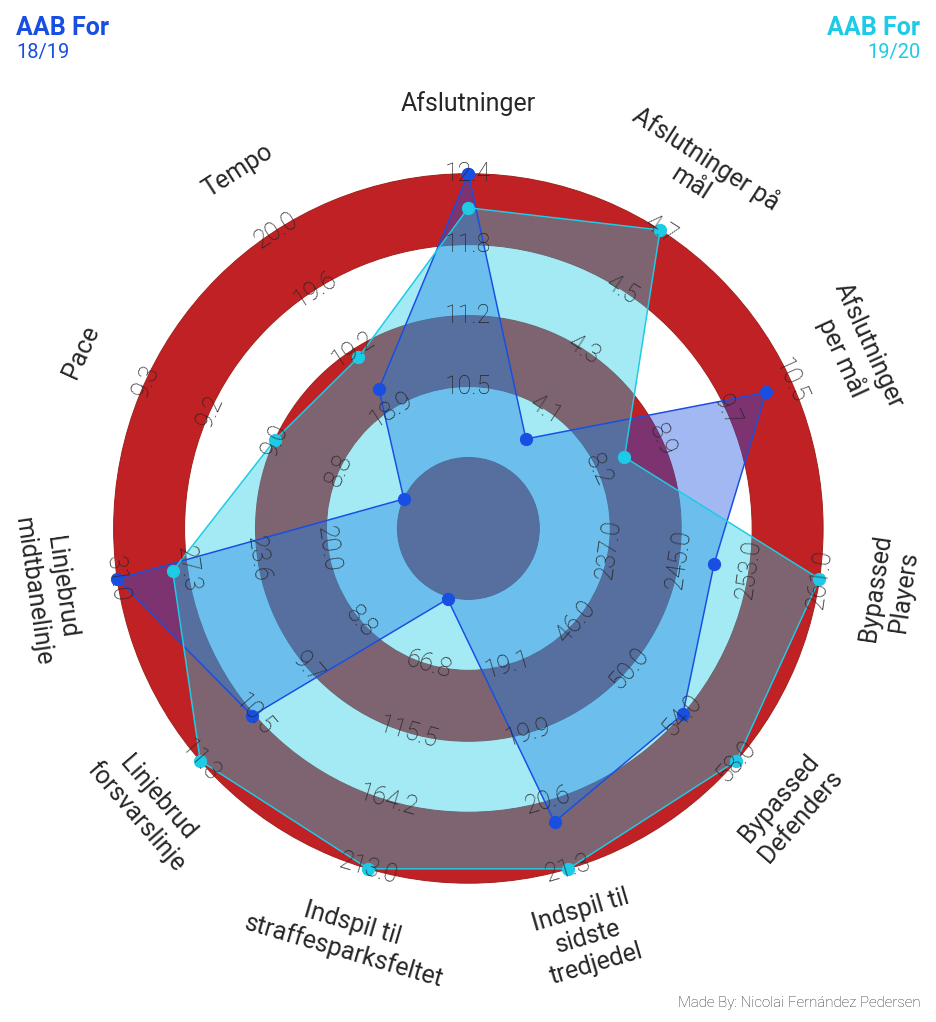

In [4]:
# creating the figure using the function defined above:
fig, axs = radar_mosaic(radar_height=0.915, title_height=0.06, figheight=14)

# Define the colors used in the plot
#face_c = '#ffb2b2'
#edge_c = '#fc5f5f'
#c1 = '#00f2c1'
#c2 = '#d80499'

face_c = '#c02124'
edge_c = '#a2211c'
c1 = '#184fe2'
c2 = '#1dcbe6'


# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor=face_c, edgecolor=edge_c)

radar_output = radar.draw_radar_compare(aab_for18, aab_for19, ax=axs['radar'],
                                        kwargs_radar={'facecolor': c1, 'alpha': 0.4},
                                        kwargs_compare={'facecolor': c2, 'alpha': 0.4})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
vertices1 = np.vstack((vertices1, [vertices1[0, 0], vertices1[0, -1]]))
vertices2 = np.vstack((vertices2, [vertices2[0, 0], vertices2[0, -1]]))

range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_regular.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c=c1, edgecolors=c1, marker='o', s=150, zorder=2)
axs['radar'].plot(vertices1[:, 0], vertices1[:, 1], c=c1, zorder=2)
axs['radar'].scatter(vertices2[:-1, 0], vertices2[:-1, 1],
                     c=c2, edgecolors=c2, marker='o', s=150, zorder=2)
axs['radar'].plot(vertices2[:, 0], vertices2[:, 1], c=c2, zorder=2)


# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.5, 'Made By: Nicolai Fernández Pedersen', fontsize=15,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'AAB For', fontsize=25, color=c1,
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, '18/19', fontsize=20,
                                fontproperties=robotto_regular.prop,
                                ha='left', va='center', color=c1)
title3_text = axs['title'].text(0.99, 0.65, 'AAB For', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color=c2)
title4_text = axs['title'].text(0.99, 0.25, '19/20', fontsize=20,
                                fontproperties=robotto_regular.prop,
                                ha='right', va='center', color=c2)
plot_or_save(save_fig=False, save_path=data_path, save_name='radar_aab')